In [ ]:
from charm.toolbox.pairinggroup import PairingGroup, ZR, G1, G2, GT, pair
from charm.toolbox.ABEnc import ABEnc
from abenc_ph_mj18 import PH_ABE, mat_math, Inner_Product
from nizk import NIZK
from benchmark import Benchmark
from collections import defaultdict 
import time

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [3]:
with open('data_136K_mj18_tg22_enhd.pkl','rb') as file:
    datasets = pickle.load(file)

In [14]:
with open('data_136K_mj18_k_2_n_5_35_65_95_DO_5_M_100.pkl','rb') as file:
    datasets_parms = pickle.load(file)

## Ploting


### Functions

In [43]:
def plot_entities(xs, ys, labels, label_size=22, legend_size=22, fig_name = ""):
    # Plotting:
    plt.figure(figsize=(10,6))

    # List of linestyles for variation. You can extend this if needed.
    linestyles = ['-.', '--', '-',':','solid', 'dashed', 'dashdot', 'dotted']
    sp_linestyles = ['-.', ':', '-']
    
    # Plotting the regular data points for each k_value
    for y, label, style in zip(ys, labels, linestyles):
        #print (xs, y)
        plt.plot(xs, y, label=f'{label}', linestyle=style)

    # Setting labels, title, legend, etc.
    plt.xlabel('Number of attribute authority', fontsize = label_size)
    plt.ylabel('Elapsed Time (seconds)', fontsize = label_size)
    # plt.title(f'Performance result with fixed k: {k}', fontsize = title_size)
    plt.legend(prop={'size': legend_size})
    plt.grid(True)
    plt.tight_layout()

    if fig_name:
        plt.savefig('./figures/'+fig_name+'.png', dpi = 150)
        
    #plt.title(title)
    plt.show()

In [44]:
def plot_comp_total(xs, ys, comp_ys, labels,label_size = 22, legend_size = 22, fig_name = ""):
    plt.figure(figsize=(10, 6))

    linestyles = ['-.','--', ':']

    plt.plot(xs, ys, label=f'Base: {labels[0]}', linestyle='-')

    # Plotting the subsequent data sets and calculating differences for Compare Set 1
    for i, y_,  label, style in zip(range(len(ys)), comp_ys, labels[1:], linestyles):

        plt.plot(xs, y_, label=f'Cp: {label}', linestyle=style, alpha=0.7)

        plt.fill_between(xs, ys, y_, color='gray', alpha=0.2)

        diff = (np.array(y_) - np.array(ys)) / np.array(ys) * 100
        avg_increase = np.mean(diff)

        # Finding the midpoint for annotation
        mid_index = len(xs) // 2  # Finding the index at the middle of the dataset
        mid_x = xs[mid_index]  # X-coordinate at the midpoint
        mid_y = (ys[mid_index] + y_[mid_index]) / 2  # Average Y-coordinate at the midpoint

        #print (avg_increase, mid_x, mid_y)

        if avg_increase >= 0:
            plt.annotate(f'Avg. increase: {avg_increase:.2f}%', xy=(mid_x, (mid_y+y_[-1])/2), textcoords='data', ha='center', size= 25)
        else:
            plt.annotate(f'Avg. decrease: {-avg_increase:.2f}%', xy=(mid_x, (mid_y+y_[0])/2), textcoords='data', ha='center', size= 25)


    plt.xlabel('Number of attribute authority', fontsize = label_size)
    plt.ylabel('Time Cost (seconds)', fontsize = label_size)
    plt.legend(prop={'size': legend_size})
    plt.grid(True)
    plt.tight_layout()

    if fig_name:
        plt.savefig('./figures/'+fig_name+'.png', dpi = 150)
        
    #plt.title(title)
    plt.show()

In [45]:
def plot_comp_detail(xs, ys, comp_ys, labels, scheme_labels, show = True, label_size = 22, legend_size = 22, fig_name = ""):
    plt.figure(figsize=(10, 6))

    linestyles = ['-', '-.','--', ':']

    # Plotting the subsequent data sets and calculating differences for Compare Set 1
    for i, y, y_, label, style in zip(range(len(ys)), ys, comp_ys, labels, linestyles):
        plt.plot(xs, y, label=f'Base{i+1}: {label} of {scheme_labels[0]}', linestyle=style)
        plt.plot(xs, y_, label=f'CP{i+1}: {label} of {scheme_labels[1]}', linestyle=style, alpha=0.7)

        plt.fill_between(xs, y, y_, color='gray', alpha=0.2)

        diff = (np.array(y_) - np.array(y)) / np.array(y) * 100
        avg_increase = np.mean(diff)

        # if avg_increase > 300:
        #     avg_increase = np.mean(diff * np.array(y) / 100)

        # Finding the midpoint for annotation
        mid_index = len(xs) // 2  # Finding the index at the middle of the dataset
        mid_x = xs[mid_index]  # X-coordinate at the midpoint
        mid_y = (y[mid_index] + y_[mid_index]) / 2  # Average Y-coordinate at the midpoint

        if not show:
            continue
        
        if avg_increase >= 0:
            plt.annotate(f'Avg. increase: {avg_increase:.2f}%', xy=(mid_x, (mid_y+y_[-1])/2), textcoords='data', ha='center', size= 25)
        else:
            plt.annotate(f'Avg. decrease: {-avg_increase:.2f}%', xy=(mid_x, (mid_y+y[0])/2), textcoords='data', ha='center', size= 25)

    plt.xlabel('Number of attribute authority', fontsize = label_size)
    plt.ylabel('Time Cost (seconds)', fontsize = label_size)
    plt.legend(prop={'size': legend_size})
    plt.grid(True)
    plt.tight_layout()

    if fig_name:
        plt.savefig('./figures/'+fig_name+'.png', dpi = 150)
        
    #plt.title(title)
    plt.show()

### Plots

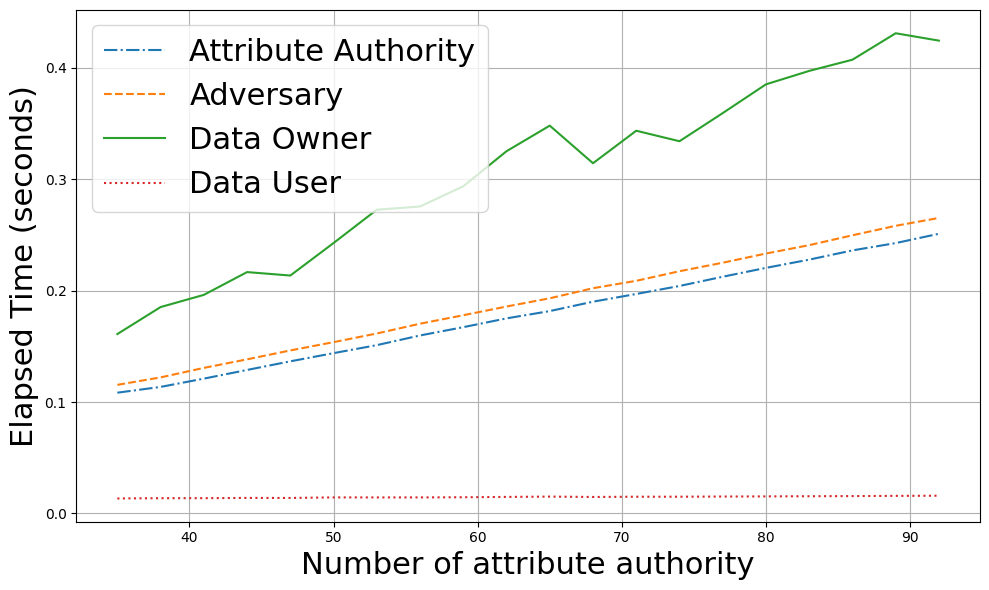

In [46]:
k = 2
xs = range(35,95,3)
aa = []
do = []
du = []
ad = []
labels = ['Attribute Authority', 'Adversary', 'Data Owner', 'Data User']

for n in xs:
    d = datasets[f'k_{str(k)}_n_{str(n)}']['mj18']
    aa.append((d['auth'] + d['keygen'])/n)
    ad.append(d['ad_setup'] + d['ad_cancel_out'] + d['ad_keygen'])
    do.append(d['encrypt'])
    du.append(d['decrypt'])

plot_entities(xs, [aa,ad, do,du], labels)

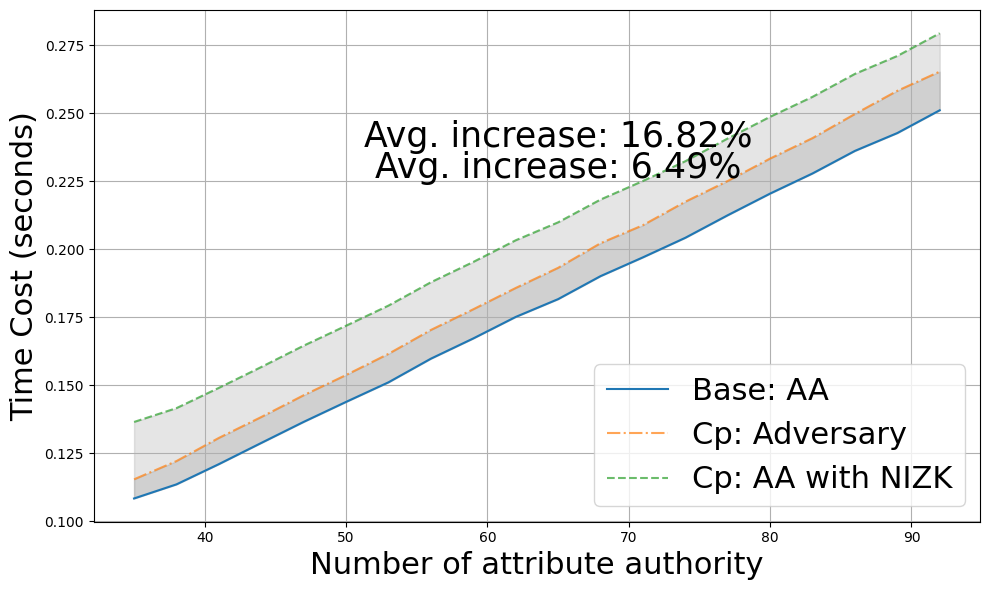

In [47]:
k = 2
xs = range(35,95,3)
comp1 = []
comp2 = []
base = []

for n in xs:
    d = datasets[f'k_{str(k)}_n_{str(n)}']['mj18']
    base.append((d['auth'] + d['keygen'])/n)
    comp1.append(d['ad_setup'] + d['ad_cancel_out'] + d['ad_keygen'])
    comp2.append((d['auth'] + d['keygen'] + d['prove'] + d['verify'])/n)

plot_comp_total(xs, base, [comp1, comp2], ['AA', 'Adversary', 'AA with NIZK'], fig_name="comp_AA_Adv_AA-NIZK")

In [54]:
def plot_cost_pct(datasets, k, settings, label_size = 22, legend_size = 22, fig_name = ""):
    plt.figure(figsize=(10, 6))

    linestyles = ['-', '-.','--', ':']


    for set, style in zip(settings, linestyles):
        dataset = datasets[f'k_{str(k)}_n_{str(set[0])}']
        setup = dataset['auth'] + dataset['prove'] + dataset['verify']

        keygen_cost = sum(dataset['keygen'][:set[1]])
        total_cost = dataset['sys'] + setup + keygen_cost

        xs = range(len(dataset['encrypt']))
        ys = []
        for i in xs:
            total_cost += dataset['encrypt'][i] + dataset['decrypt'][i]
            ys.append(setup/total_cost*100)
        
        plt.plot(xs, ys, label=f'# AA: {set[0]}, # DO: {set[1]}', linestyle = style, alpha = 0.7)

    plt.xlabel('Number of encrypted files M', fontsize = label_size)
    plt.ylabel('Total cost percentage (%)', fontsize = label_size)
    plt.legend(prop={'size': legend_size})
    plt.grid(True)
    plt.tight_layout()

    if fig_name:
        plt.savefig('./figures/'+fig_name+'.png', dpi = 150)
        
    #plt.title(title)
    plt.show()

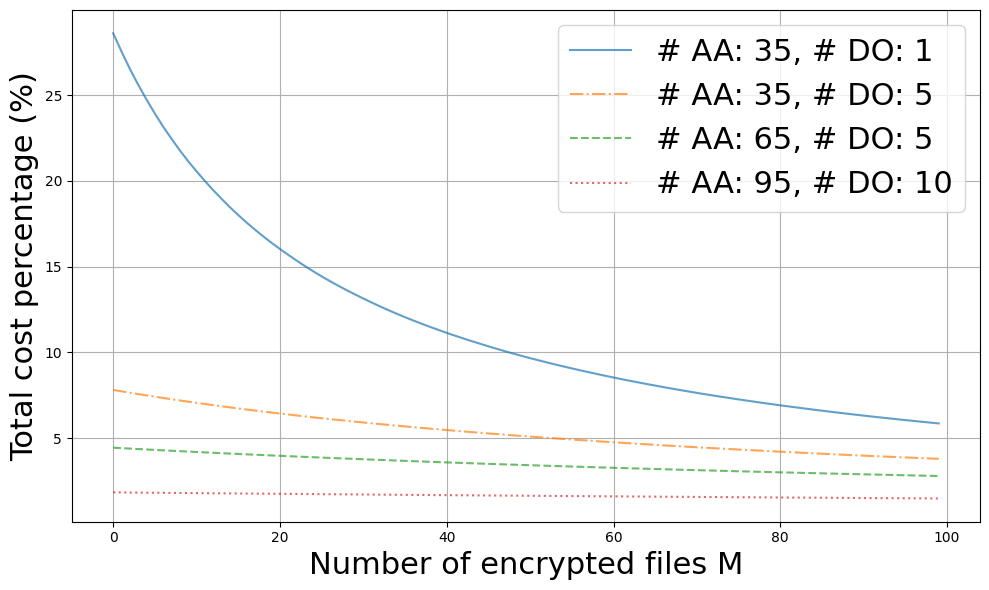

In [55]:
plot_cost_pct(datasets_parms,2,[(35,1),(35,5),(65,5),(95,10)], fig_name="trust_setup_pct_total_diff_setting")